# Case study on Supervised learning

## Question:

Do the following in the iris dataset.

**1. Read the dataset to the python environment.**

**2. Do necessary pre-processing steps.**

**3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)**

## Answer:

In [1]:
# importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read the dataset to the python environment

In [2]:
data=pd.read_excel('iris (2).xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Feature Description 

Iris is a flowering plant, the researchers have measured various features of the different iris flowers and recorded digitally.

Iris dataset contains five columns such as

**PL=Petal Length**

**PW=Petal Width**

**SL=Sepal Length**

**SW=Sepal Width** and

**Classification=Species Type** which are:
    
   **Iris Setosa**
   **Iris Versicolour**
   **Iris Virginica**

The data set contains 3 classes of 50 instances each.

The dataset is often used in data mining, classification and clustering examples and to test algorithms.

In [3]:
 data.shape

(150, 5)

In [4]:
data.Classification.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Insights:

* **In this data set there are 150 entries and 5 columns with float64(4) and object(1) datatypes.**
* **null values are present in the dataset.**
* **sample entries ranging from 0.1 to 6.9 approximately.**

## 2. Do necessary pre-processing steps.

### Handling missing values 

In [7]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

* **There are missing values in SL(7),SW(6) and PW(6).** 

In [8]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

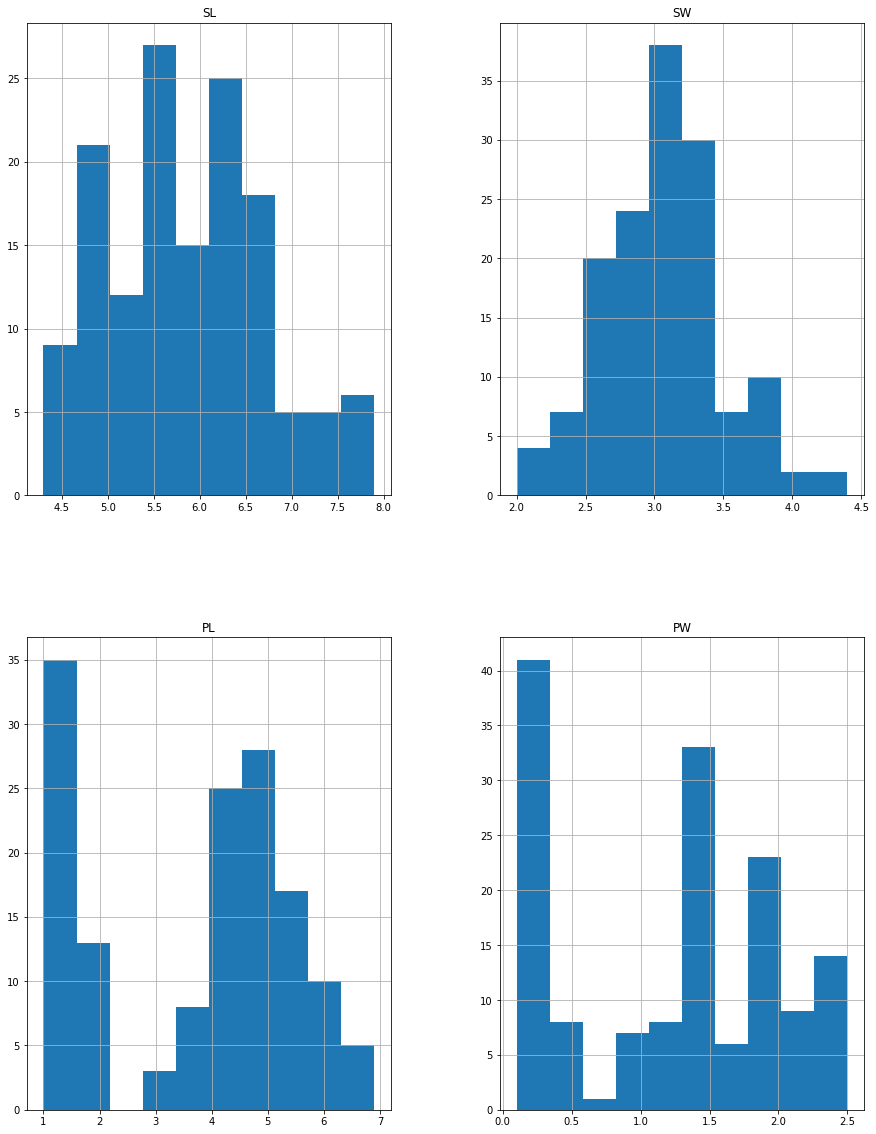

In [9]:
# Plotting histogram to understand the distribution of features
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(15,20))
plt.show

In [10]:
# Handling missing values with median of each column
for i in data[['SL','PL']] :
    data[i]=data[i].fillna(data[i].median())

In [11]:
# Handling missing values with mean of SW column
data['SW']=data['SW'].fillna(data['SW'].mean())

In [12]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [13]:
# Now there is no null values in the data set

### checking and Handling outliers

<AxesSubplot:>

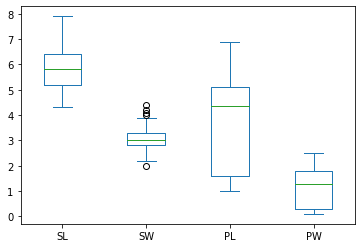

In [14]:
# Displaying outliers in data using boxplot
data.plot(kind='box')

* **only Sw column has outliers present.**

In [15]:
# executing codes to reduce outliers
Q1 = np.percentile(data['SW'], 25, interpolation = "midpoint")
Q2 = np.percentile(data['SW'], 50, interpolation = "midpoint")
Q3 = np.percentile(data['SW'], 75, interpolation = "midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
print('lower limit is:',low_lim)
print('upper limit is:',upper_lim)
outlier=[]
for x in data['SW']:
    if((x>upper_lim) or (x<low_lim)):
        outlier.append(x)
print('outliers are:',outlier) 
ind1=data['SW']>upper_lim
data.loc[ind1].index
    

lower limit is: 2.1249999999999996
upper limit is: 3.9250000000000003
outliers are: [4.0, 4.4, 4.1, 4.2, 2.0]


Int64Index([14, 15, 32, 33], dtype='int64')

In [16]:
ind2=data['SW']<low_lim
data.loc[ind2].index

Int64Index([60], dtype='int64')

In [17]:
# dropping the index having outliers
data.drop([14, 15, 32, 33,60],inplace=True)

<AxesSubplot:>

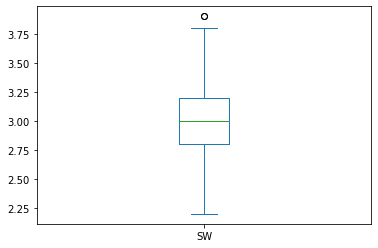

In [18]:
# Displaying SW column after reducing outlier
data['SW'].plot(kind='box')

### Encoding

In [19]:
# importing label encoder and encoding the Classification column
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['Classification']=lb.fit_transform(data['Classification'])

In [20]:
data['Classification'].unique()

array([0, 1, 2])

In [21]:
# displaying data after encoding
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### checking the relation between features

In [22]:
matrix=data.corr()

<AxesSubplot:>

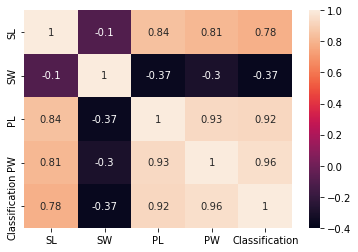

In [23]:
# plotting heatmap to get better understanding
sns.heatmap(matrix,vmin=-0.4,vmax=1,linewidth=0,annot=True)

### Insights:

* **Features are highly correlated.**
* **Among them,petal width is positively highly correlated(0.96) with Classification,where sepal width is negatively highly correlated(-0.37) with classification.**

## 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)


In [129]:
# setting variables x asindependent features and y as target feature 
x=data[['SL', 'SW', 'PL', 'PW']]
y=data['Classification']
y=y.values.reshape(-1,1)

#### Splitting variables

In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)


In [161]:
x_train.shape

(101, 4)

In [162]:
y_train.shape

(101, 1)

In [163]:
x_test.shape

(44, 4)

In [165]:
y_test.shape

(44, 1)

### 1.RandomForestClassifier

In [131]:
# importing Randomforestclassifier 
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
# fitting trained samples in the classifier
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

C:\Users\SHEMI~1.DES\AppData\Local\Temp/ipykernel_14252/140031308.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


#### checking efficiency of the classification model

In [132]:
# importing measures (f1_score,confusion _matrix and accuracy_score)to evaluate the performance of the classifier
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score

In [133]:
print('f1 score is:', f1_score(y_test,y_pred, pos_label=1,average='micro'))
print('Accuracy score is:',accuracy_score(y_test,y_pred))

f1 score is: 0.9545454545454546
Accuracy score is: 0.9545454545454546


In [134]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 13,  1],
       [ 0,  1, 14]], dtype=int64)

### 2.LogisticRegressionClassifier

In [135]:
x=data[['SL', 'SW', 'PL', 'PW']]
y=data['Classification']
y=y.values.reshape(-1,1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)


In [136]:
# importing logistic classifier and fitting trained samples in the classifier
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression( tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=2, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)

C:\Users\SHEMI.DESKTOP-LJACJ0V\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHEMI.DESKTOP-LJACJ0V\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### checking efficiency of the classification model

In [137]:
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('f1 score is:',f1_score(y_test,y_pred,average='micro'))

Accuracy score is: 0.9318181818181818
f1 score is: 0.9318181818181818


In [138]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 1, 12,  0],
       [ 0,  2, 14]], dtype=int64)

### 3.Support Vector Machine Classifier

In [148]:
x=data[['SL', 'SW', 'PL', 'PW']]
y=data['Classification']
y=y.values.reshape(-1,1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)


In [149]:
# importing svc from sklearn.svm and fitting trained samples in the classifier
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(x_train,y_train)

y_pred = svc.predict(x_test)

C:\Users\SHEMI.DESKTOP-LJACJ0V\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


#### checking efficiency of the classification model

In [150]:
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('f1 score is:',f1_score(y_test,y_pred,average='micro'))

Accuracy score is: 0.9772727272727273
f1 score is: 0.9772727272727273


In [151]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 15]], dtype=int64)

### 4.K-Neighbors Classifier

In [152]:
x=data[['SL', 'SW', 'PL', 'PW']]
y=data['Classification']
y=y.values.reshape(-1,1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)


In [153]:
# importing knn and fitting trained samples in the classifier
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

C:\Users\SHEMI.DESKTOP-LJACJ0V\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [154]:
y_pred=knn.predict(x_test)

#### checking efficiency of the classification model

In [155]:
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('f1 score is:',f1_score(y_test,y_pred,average='micro'))

Accuracy score is: 0.9545454545454546
f1 score is: 0.9545454545454546


In [156]:
confusion_matrix(y_test,y_pred)

array([[12,  1,  0],
       [ 0, 13,  1],
       [ 0,  0, 17]], dtype=int64)

### 5.Decision Tree Classifier

In [157]:
x=data[['SL', 'SW', 'PL', 'PW']]
y=data['Classification']
y=y.values.reshape(-1,1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)


In [158]:
# importing Decision tree classifier and fitting trained samples in the classifier
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier().fit(x_train,y_train)

y_pred=dt.predict(x_test)

#### checking efficiency of the classification model

In [159]:
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('f1 score is:',f1_score(y_test,y_pred,average='micro'))

Accuracy score is: 0.9545454545454546
f1 score is: 0.9545454545454546


In [160]:
confusion_matrix(y_test,y_pred)

array([[17,  0,  0],
       [ 0, 15,  1],
       [ 0,  1, 10]], dtype=int64)

### Inference:

* **From the accuracy score,f1 score and confusion matrix, we can conclude that SVM classifier model is best fit model to predict the classification of iris dataset.SVM model has the accuracy score of 0.977.**
* **3 models:Randomforest classifier,decision tree and KNN have same accuracy score 0.954.**
* **Among 5 models,logistic regression classifier model possess least accuracy score of  0.9318.it doesn't mean that it is not a good model.it is a good one because the score is above 0.5.when compairing with all models it is a low score.**    

Submitted by:**Shameema Muneer,DSA Batch03**